<img src="http://hilpisch.com/tpq_logo.png" width="36%" align="right" style="vertical-align: top;">

# Natural Language Processing

**Basic Techniques and Algorithms**

_Case Study_

Dr Yves J Hilpisch

The Python Quants GmbH

## Data Retrieval

In [1]:
import requests

In [2]:
sources = [
    'https://nr.apple.com/dE0b1T5G3u',  # iPad Pro
    'https://nr.apple.com/dE4c7T6g1K',  # MacBook Air
    'https://nr.apple.com/dE4q4r8A2A',  # Mac Mini
]

In [3]:
html = [requests.get(url).text for url in sources]

In [4]:
len(html[0])

151611

In [5]:
html[0][:500]

'<!DOCTYPE html>\n\n\n\n\n\n\t\n\t\t\n\t\t\n\t\t\t<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-US" lang="en-US" prefix="og: http://ogp.me/ns#" class="no-js">\n\t\t\n\t\n\t\n\n\n\t\n\n\n<head>\n\t\n\t\n\t\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<meta charset="utf-8" />\n\n\t \n    \t <link rel="canonical" href="https://www.apple.com/newsroom/2018/10/new-ipad-pro-with-all-screen-design-is-most-advanced-powerful-ipad-ever/"/>\n    \t \n    \t \n\t\n<meta name="viewport" content="width=device-width, initial-scale=1, viewport-fit=cover" />\n\n\t\n\t\n\t<lin'

## Preprocessing

In [6]:
import nlp_functions as nlp

In [7]:
data = [nlp.clean_up_text(t) for t in html]

In [8]:
data[0][:500]

'new ipad pro with all screen designis most advanced powerful ipad ever apple global nav open menu global nav close menu apple shopping bag search apple com cancel apple mac ipad iphone watch tv music support shopping bag newsroom open menu close menu archive apple tv press apple newsroom needs your permission to enable desktop notifications when new articles are published press release october   new ipad pro with all screen designis most advanced powerful ipad ever  inch and   inch models featur'

## Basic Text Analysis

In [9]:
import nltk

In [10]:
nltk.__version__

'3.4.5'

In [11]:
# to be executed once
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

### Basic Tokenization and Vocabulary

In [12]:
t = 'A sentence about NLP; and about ML.'

In [13]:
nltk.word_tokenize(t)

['A', 'sentence', 'about', 'NLP', ';', 'and', 'about', 'ML', '.']

In [14]:
nltk.word_tokenize(data[0])[:10]

['new',
 'ipad',
 'pro',
 'with',
 'all',
 'screen',
 'designis',
 'most',
 'advanced',
 'powerful']

In [15]:
tokens = nltk.word_tokenize(' '.join(data))

In [16]:
text = nltk.Text(tokens)

In [17]:
text.count('ipad')

93

In [18]:
text.count('mojave')

9

In [19]:
text.collocations()

ValueError: too many values to unpack (expected 2)

In [20]:
text.similar('performance')

wireless viewer efficiency memory


In [21]:
text.common_contexts(['ipad', 'macbook'])

new_pro to_pro for_pro


In [22]:
text.vocab()

FreqDist({'and': 259, 'the': 235, 'apple': 179, 'to': 133, 'new': 116, 'for': 106, 'ipad': 93, 'with': 85, 'a': 83, 'pro': 73, ...})

In [23]:
text.concordance('macbook', width=70, lines=7)

Displaying 7 of 45 matches:
refunds legal site map all new macbook air takes flight apple global 
acbookair takes flight all new macbook air features inch retina displ
le today introduced an all new macbook air bringing a stunning inch r
ery life its known for the new macbook air is available in three gorg
and thunderbolt making the new macbook air the perfect notebook to ta
ou everywhere you go the first macbook air revolutionized mac with it
orldwide marketing redesigning macbook air started with a stunning re


In [24]:
text.concordance('mojave', width=70, lines=7)

Displaying 7 of 9 matches:
rbolt ports and of course macos mojave in a beautiful thinner lighter 
ion so text and images in macos mojave look sharp and stunning and wit
n and rendering workloads macos mojave all new macs come with macos mo
ve all new macs come with macos mojave the latest version of the world
 designed for everyone in macos mojave a new dark mode transforms the 
dobe macbook air includes macos mojave featuring dark mode stacks new 
 broadest mac lineup ever macos mojave all new macs come with macos mo


In [25]:
words = sorted(set([w.lower() for w in tokens]))

In [26]:
len(words)

1134

In [27]:
words[:7]

['a', 'ability', 'about', 'abowman', 'access', 'accessibility', 'accessories']

### Improved Tokenization and Vocabulary

In [28]:
t = 'A sentence about NLP; and about ML.'

In [29]:
tokens = nlp.tokenize(t, min_char=3)
tokens

['sentence', 'NLP']

In [30]:
%time tokens = nlp.tokenize(' '.join(data))

CPU times: user 48.2 ms, sys: 1.44 ms, total: 49.6 ms
Wall time: 48.8 ms


In [31]:
tokens[:7]

['ipad', 'screen', 'designis', 'advance', 'powerful', 'ipad', 'ever']

In [32]:
words = sorted(set([w.lower() for w in tokens]))

In [33]:
len(words)

921

In [34]:
words[:6]

['ability', 'abowman', 'access', 'accessibility', 'accessory', 'account']

## Similarity

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
ts = [
    'A sentence about NLP; and about ML.',
    'Another one about NLP and algorithms.',
    'A text fragment about Apple.'
]

In [37]:
vec = TfidfVectorizer(stop_words='english')

In [38]:
mat = vec.fit_transform(ts)

In [39]:
mat.A.round(3)

array([[0.   , 0.   , 0.   , 0.623, 0.474, 0.623, 0.   ],
       [0.796, 0.   , 0.   , 0.   , 0.605, 0.   , 0.   ],
       [0.   , 0.577, 0.577, 0.   , 0.   , 0.   , 0.577]])

In [40]:
df = pd.DataFrame(mat.A, columns=vec.get_feature_names())

In [41]:
df.round(3)

,algorithms,apple,fragment,ml,nlp,sentence,text
0,0.000,0.000,0.000,0.623,0.474,0.623,0.000
1,0.796,0.000,0.000,0.000,0.605,0.000,0.000
2,0.000,0.577,0.577,0.000,0.000,0.000,0.577


In [42]:
(mat * mat.T).A

array([[1.        , 0.28671097, 0.        ],
       [0.28671097, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [43]:
tl = [' '.join(nlp.tokenize(t)) for t in data]

In [44]:
mat = vec.fit_transform(tl)
mat

<3x860 sparse matrix of type '<class 'numpy.float64'>'
	with 1479 stored elements in Compressed Sparse Row format>

In [45]:
sm = (mat * mat.T).A
sm

array([[1.        , 0.43109432, 0.37120845],
       [0.43109432, 1.        , 0.49538715],
       [0.37120845, 0.49538715, 1.        ]])

In [46]:
prs = ['ipad', 'air', 'mini']

In [47]:
df = pd.DataFrame(sm, index=prs, columns=prs)

In [48]:
df

,ipad,air,mini
ipad,1.000000,0.431094,0.371208
air,0.431094,1.000000,0.495387
mini,0.371208,0.495387,1.000000


## Word Clouds

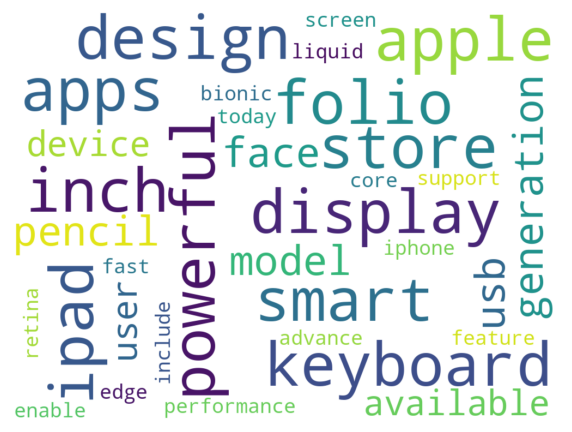

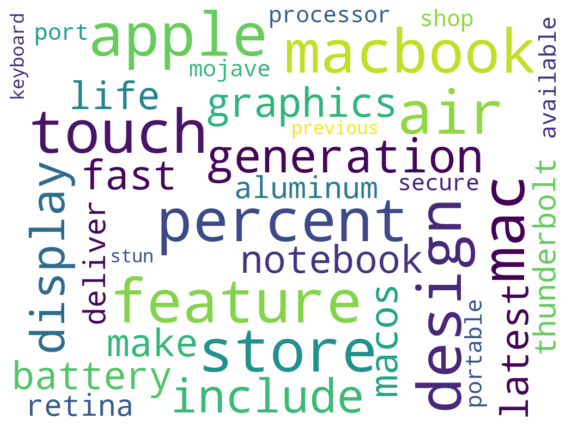

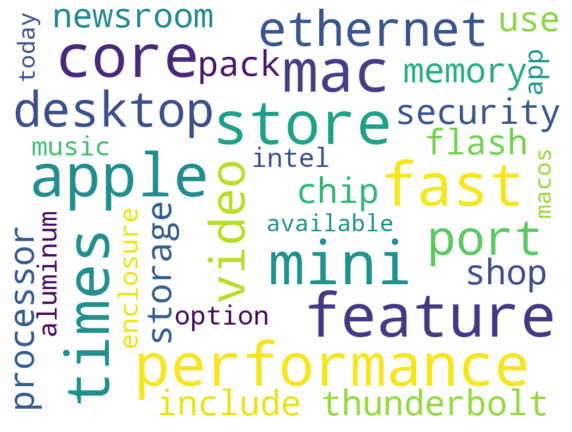

In [49]:
for name, text in zip(prs, data):
    nlp.generate_word_cloud(text, 35)#,
           # name='/images/wc_{}.png'.format(name))

## Topic Modeling

### NMF Clustering

In [50]:
from sklearn.decomposition import NMF

In [51]:
vec = TfidfVectorizer(stop_words='english')

In [52]:
mat = vec.fit_transform(data)

In [53]:
nmf = NMF(n_components=len(data))

In [54]:
nmf.fit(mat)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=3, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [55]:
nmf.components_.round(3)

array([[0.013, 0.   , 0.   , ..., 0.01 , 0.   , 0.   ],
       [0.007, 0.009, 0.018, ..., 0.005, 0.009, 0.009],
       [0.   , 0.   , 0.   , ..., 0.008, 0.   , 0.   ]])

In [56]:
feature_names = vec.get_feature_names()

In [57]:
n_words = 8

In [58]:
for i, topic in enumerate(nmf.components_[:n_words]):
    print('TOPIC %d'% (i))
    print(60 * '=')
    print(', '.join([feature_names[i] for i in
                     topic.argsort()[:-n_words-1:-1]]) + '\n')

TOPIC 0
mini, apple, mac, menu, new, ethernet, performance, faster

TOPIC 1
ipad, apple, pro, new, folio, inch, menu, smart

TOPIC 2
apple, macbook, air, new, menu, notebook, touch, percent



### KMeans Clustering

In [59]:
import collections
from sklearn.cluster import KMeans

In [60]:
n_clusters = len(data)

In [61]:
km = KMeans(n_clusters=n_clusters)

In [62]:
km.fit(mat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
n_kw = 7

In [64]:
sorted_centroids = km.cluster_centers_.argsort()[:, ::-1]
words = vec.get_feature_names()
kw_list = []
for c in range(n_clusters):
    keywords = []
    for w in sorted_centroids[c, :n_kw]:
        keywords.append(words[w])
    kw_list.append(keywords)

In [65]:
kw_list

[['apple', 'macbook', 'air', 'new', 'menu', 'notebook', 'percent'],
 ['ipad', 'apple', 'pro', 'new', 'folio', 'inch', 'menu'],
 ['mini', 'apple', 'mac', 'menu', 'new', 'ethernet', 'faster']]

In [66]:
kw_df = pd.DataFrame(index=['topic_{}'.format(i) for i in range(n_clusters)], 
                           columns=['keyword_{}'.format(i) for i in range(n_kw)],
                           data=kw_list)

In [67]:
kw_df

,keyword_0,keyword_1,keyword_2,keyword_3,keyword_4,keyword_5,keyword_6
topic_0,apple,macbook,air,new,menu,notebook,percent
topic_1,ipad,apple,pro,new,folio,inch,menu
topic_2,mini,apple,mac,menu,new,ethernet,faster


## Summarization

In [68]:
import pprint
from gensim.summarization import keywords
from gensim.summarization.summarizer import summarize

In [69]:
for i, tokens in enumerate(tl):
    print('\nTEXT {}\n'.format(i) + 50 * '=')
    kws = keywords(tokens, words=8, split=False,
                   lemmatize=True, scores=True)
    pprint.pprint(kws)


TEXT 0
[('ipad', 0.5257208372206974),
 ('apple', 0.44857023534654966),
 ('power', 0.14482135073565436),
 ('design', 0.13736577532865754),
 ('app', 0.1256982450881698),
 ('display', 0.10601057962789877),
 ('usb', 0.09923947643965),
 ('availability', 0.0990813684697708)]

TEXT 1
[('apple', 0.5668729236705377),
 ('macbook', 0.2505140903943298),
 ('feature', 0.15181254968364646),
 ('airs', 0.14675134512848095),
 ('percent', 0.1438461339626251),
 ('touch', 0.11933427458472433),
 ('shop', 0.10607176467702545),
 ('include', 0.10580409726513666)]

TEXT 2
[('apple', 0.5869147235081635),
 ('mac mini', 0.25435507488291187),
 ('performance', 0.1928214396814765),
 ('fast', 0.14206863043306117),
 ('desktop', 0.13998723665535295),
 ('shop', 0.11333712249651928),
 ('use', 0.10471084571632408)]


In [70]:
texts = [nlp.clean_up_html(h) for h in html]

In [71]:
len(texts[0])

15277

In [72]:
for i, text in enumerate(texts):
    print('\nTEXT {}\n'.format(i) + 50 * '=')
    print(summarize(text, word_count=45))


TEXT 0
There has never been a mobile device anything like the new iPad Pro; it has a gorgeous edge-to-edge Liquid Retina display that curves into the corners, breakthrough performance that outperforms most laptops, Face ID, support for the new Smart Keyboard Folio and new Apple Pencil, advanced new cameras and sensors for the best AR experiences ever in any device, a high-speed USB-C connector, louder speakers, faster wireless and more, all packed into a thinner device that has all-day battery life and is 25 percent smaller in volume.

TEXT 1
Redesigning MacBook Air started with a stunning Retina display and all-day battery life, and then we added Touch ID and the Apple T2 Security Chip, the latest processors, incredible sound, the third-generation keyboard and Force Touch trackpad, high speed Thunderbolt 3 ports, and of course macOS Mojave in a beautiful, thinner, lighter, all-aluminum design that a whole new generation of MacBook Air customers are going to love.

TEXT 2
Now with qua

## Sentiment Analysis

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [74]:
sid = SentimentIntensityAnalyzer()

In [75]:
p = 'The product is amazing. I love it.'

In [76]:
sid.polarity_scores(p)

{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.8402}

In [77]:
n = 'The product is of low quality. I cannot recommend it.'

In [78]:
sid.polarity_scores(n)

{'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.4956}

In [79]:
sid.polarity_scores(' '.join(data))

{'neg': 0.007, 'neu': 0.896, 'pos': 0.097, 'compound': 0.9999}

In [80]:
scores = [sid.polarity_scores(l) for l in data]

In [81]:
scores

[{'neg': 0.006, 'neu': 0.862, 'pos': 0.132, 'compound': 0.9998},
 {'neg': 0.007, 'neu': 0.912, 'pos': 0.08, 'compound': 0.9988},
 {'neg': 0.009, 'neu': 0.874, 'pos': 0.117, 'compound': 0.9995}]

<img src="http://hilpisch.com/tpq_logo.png" width="36%" align="right" style="vertical-align: top;">